In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import sys

sys.path.insert(
    0,
    '..',
)

In [3]:
import numpy as np
import pandas as pd

In [4]:
np.random.seed(20121020)

In [5]:
from match.make_match_panel import make_match_panel

target.index (5) & features.columns (5) have 5 in common.
Computing score using compute_information_coefficient with 1 process ...


../match/make_match_panel.py:163: UserWarning:

Not clustering because a category has less than 2 values.



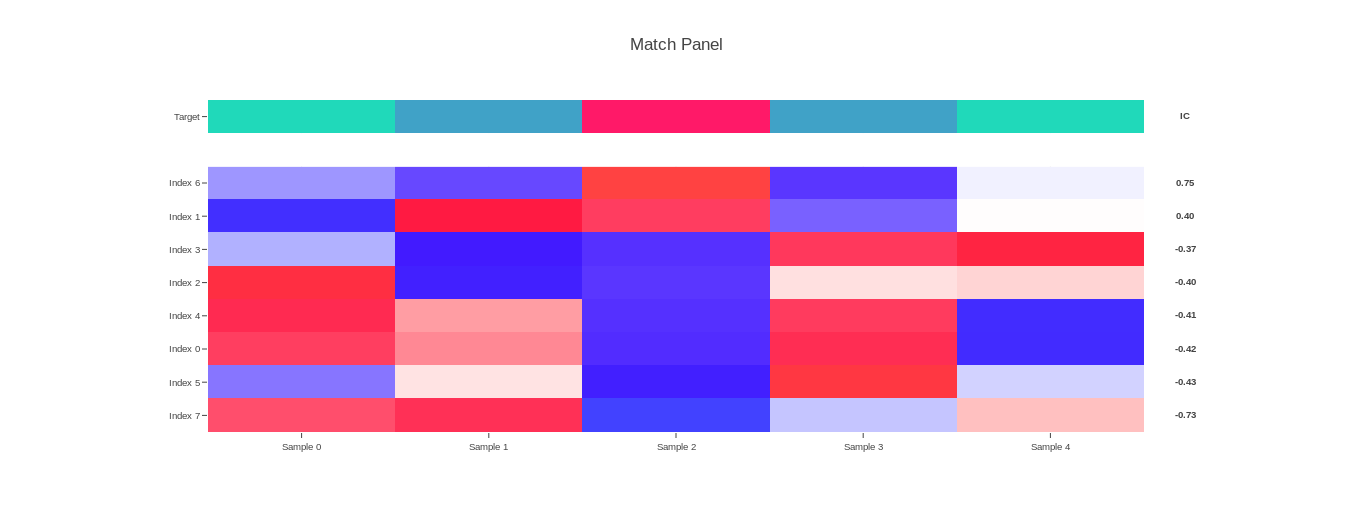

,Score,0.95 MoE,P-Value,FDR
Index 6,0.746456,NaN,NaN,NaN
Index 1,0.401875,NaN,NaN,NaN
Index 3,-0.369932,NaN,NaN,NaN
Index 2,-0.404746,NaN,NaN,NaN
Index 4,-0.410464,NaN,NaN,NaN
Index 0,-0.419548,NaN,NaN,NaN
Index 5,-0.434535,NaN,NaN,NaN
Index 7,-0.730849,NaN,NaN,NaN


In [6]:
target = [
    1,
    2,
    8,
    2,
    1,
]

target = pd.Series(
    target, 
    name='Target',
    index=('Sample {}'.format(i) for i in range(len(target))),
)

n_row = 8

features = pd.DataFrame(
    np.random.random_sample(size=(
        n_row,
        target.size,
    )),
    index=('Index {}'.format(i) for i in range(n_row)),
    columns=target.index,
)

make_match_panel(
    target,
    features,
    target_ascending=None,
    target_type='categorical',
)

In [ ]:
target = pd.read_table(
    'target_0.tsv',
    index_col=0,
    squeeze=True,
)

features = pd.read_table(
    'features_0.tsv',
    index_col=0,
)

scores = make_match_panel(
    target,
    features,
    n_sampling=3,
    n_permutation=1,
    target_type='binary',
)

scores

target.index (28) & features.columns (28) have 28 in common.
Computing score using compute_information_coefficient with 1 process ...


In [ ]:
n_index = 8

n_column = 24

features = pd.DataFrame(
    np.random.random_sample(size=(
        n_index,
        n_column,
    )),
    index=('Index {}'.format(i) for i in range(n_index)),
    columns=('Column {}'.format(i) for i in range(n_column)),
)

for target in (
        pd.Series((0, ) * 1 + (1, ) * 15 + (2, ) * 8),
        pd.Series((0, ) * 8 + (2, ) * 8 + (1, ) * 8),
        pd.Series(('Aa', ) * 4 + ('Bb', ) * 4 + ('Cc', ) * 4 + ('Aa', ) * 4 + ('Bb', ) * 4 + ('Cc', ) * 4),
):
    
    target.name = 'Target'
    
    target.index = ('Column {}'.format(i) for i in range(n_column))

    scores = make_match_panel(
        target,
        features,
        target_ascending=True,
        n_sampling=3,
        n_permutation=1,
        target_type='categorical',
    )

In [ ]:
n_index = 8

n_column = 24

target = pd.Series(
    np.random.random_sample(size=n_column + 1),
    name='Target',
    index=('Column {}'.format(i) for i in range(n_column + 1)),
)

features = pd.DataFrame(
    np.random.random_sample(size=(
        n_index,
        n_column,
    )),
    index=('ABCDEFGHIJKLMNOPQ{}'.format(i) for i in range(n_index)),
    columns=('Column {}'.format(i) for i in range(n_column)),
)

features.iloc[0] = 0

features.loc[np.random.choice(
    features.index,
    size=features.index.size // 8 * 7,
    replace=False,
), np.random.choice(
    features.columns,
    size=features.columns.size // 8 * 7,
    replace=False,
)] = np.nan

scores = make_match_panel(
    target,
    features,
    target_ascending=None,
    n_sampling=3,
    n_permutation=1,
)

scores

In [ ]:
n_index = 8

n_column = 80

target = pd.Series(
    np.random.random_sample(size=n_column),
    name='Target',
    index=('Column {}'.format(i) for i in range(n_column)),
)

features = pd.DataFrame(
    np.random.random_sample(size=(
        n_index,
        n_column,
    )),
    index=('Index {}'.format(i) for i in range(n_index)),
    columns=('Column {}'.format(i) for i in range(n_column)),
)

scores = make_match_panel(
    target,
    features,
    plot_target_std_max=1,
    plot_features_std_max=2,
)

features = pd.DataFrame(
    np.random.random_integers(
        0,
        8,
        size=(
            n_index,
            n_column,
        ),
    ),
    index=('Index {}'.format(i) for i in range(n_index)),
    columns=('Column {}'.format(i) for i in range(n_column)),
)

scores = make_match_panel(
    target,
    features,
    features_type='categorical',
)

features = pd.DataFrame(
    np.random.random_integers(
        0,
        1,
        size=(
            n_index,
            n_column,
        ),
    ),
    index=('Index {}'.format(i) for i in range(n_index)),
    columns=('Column {}'.format(i) for i in range(n_column)),
)

scores = make_match_panel(
    target,
    features,
    features_type='binary',
)

scores

In [ ]:
from match.make_summary_match_panel import make_summary_match_panel

n_index = 8

n_column = 24

features_continuous = pd.DataFrame(
    np.random.random_sample(size=(
        n_index,
        n_column,
    )),
    index=('Continuous Index {}'.format(i) for i in range(n_index)),
    columns=('Column {}'.format(i) for i in range(n_column)),
)

features_categorical = pd.DataFrame(
    np.random.random_integers(
        0,
        8,
        size=(
            n_index,
            n_column,
        )),
    index=('Categorical Index {}'.format(i) for i in range(n_index)),
    columns=('Column {}'.format(i) for i in range(n_column)),
)

features_binary = pd.DataFrame(
    np.random.random_integers(
        0,
        1,
        size=(
            n_index,
            n_column,
        )),
    index=('Binary Index {}'.format(i) for i in range(n_index)),
    columns=('Column {}'.format(i) for i in range(n_column)),
)

n = 3

features_dict = {
    'Continuous features': {
        'df': features_continuous.iloc[:n, :],
        'data_type': 'continuous',
        'emphasis': 'high',
        'indices': ['Continuous Index {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
    },
    'Cotinuous features (missing last 10 & scores ascending)': {
        'df': features_continuous.iloc[:n, :],
        'data_type': 'continuous',
        'emphasis': 'low',
        'indices': ['Continuous Index {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
    },
    'Cotinuous features (missing first 10 & scores ascending)': {
        'df': features_continuous.iloc[:n, :],
        'data_type': 'continuous',
        'emphasis': 'low',
        'indices': ['Continuous Index {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
    },
    'Categorical features': {
        'df': features_categorical.iloc[:n, :],
        'data_type': 'categorical',
        'emphasis': 'high',
        'indices': ['Categorical Index {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
    },
    'Binary features': {
        'df': features_binary.iloc[:n, :],
        'data_type': 'binary',
        'emphasis': 'high',
        'indices': ['Binary Index {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
    },
}

for target, target_type in (
    (
        pd.Series(np.random.random_sample(size=n_column)),
        'continuous',
    ),
    (
        pd.Series(('Aa', ) * 4 + ('Bb', ) * 4 + ('Cc', ) * 4 + ('Aa', ) * 4 + ('Bb', ) * 4 + ('Cc', ) * 4),
        'categorical',
    ),
):
    
    target.name = 'Target'
    
    target.index = ('Column {}'.format(i) for i in range(n_column))

    scores = make_summary_match_panel(
        target,
        features_dict,
        target_type=target_type,
    )

    scores = make_summary_match_panel(
        target,
        features_dict,
        target_type=target_type,
        plot_only_columns_shared_by_target_and_all_features=True,
    )

In [ ]:
from match.make_comparison_panel import make_comparison_panel

_2d_array_0 = np.random.random_sample(size=(
    2,
    8,
))

_2d_array_1 = np.random.random_sample(size=(
    4,
    8,
))

comparison = make_comparison_panel(
    _2d_array_0,
    _2d_array_1,
    name_0='Name 0',
    name_1='Name 1',
)

_2d_array_0 = np.random.random_sample(size=(
    132,
    108,
))

_2d_array_1 = np.random.random_sample(size=(
    132,
    116,
))

comparison = make_comparison_panel(
    _2d_array_0,
    _2d_array_1,
    axis=1,
    name_0='Name 0',
    name_1='Name 1',
)

In [ ]:
for n_index, n_column in (
    (
        8,
        2,
    ),
    (
        8,
        4,
    ),
    (
        8,
        16,
    ),
    (
        8,
        32,
    ),
    (
        8,
        160,
    ),
    (
        8,
        320,
    ),
    (
        8,
        1600,
    ),
    (
        8,
        3200,
    ),
    (
        1,
        8,
    ),
    (
        2,
        8,
    ),
    (
        4,
        8,
    ),
    (
        16,
        8,
    ),
    (
        32,
        8,
    ),
    (
        64,
        8,
    ),
    (
        128,
        8,
    ),
    (
        320,
        8,
    ),
    (
        640,
        8,
    ),
):

    target = pd.Series(
        np.random.random_sample(size=n_column),
        name='Target',
        index=('Column {}'.format(i) for i in range(n_column)),
    )

    features = pd.DataFrame(
        np.random.random_sample(size=(
            n_index,
            n_column,
        )),
        index=('Index {}'.format(i) for i in range(n_index)),
        columns=('Column {}'.format(i) for i in range(n_column)),
    )

    scores = pd.DataFrame(
        np.random.random_sample(size=(
            features.shape[0],
            4,
        )),
        index=('Index {}'.format(i) for i in range(n_index)),
        columns=(
            'Score',
            '0.95 MoE',
            'P-Value',
            'FDR',
        ),
    )

    scores = make_match_panel(
        target,
        features,
        scores=scores,
        extreme_feature_threshold=None,
        title='{}-x-{} Match Panel'.format(
            n_index,
            n_column,
        ))